In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("datasheet.csv")

### Analysis 2:

In the following step, we prepare our predictors and outcomes for the four linear regression models. The predictor for model 1 and 2 is `death_increase_num`, and that for model 3 and 4 is `death_increase_ratio`. The outcome for model 1 and 3 is `keyword_freq`, and that for model 2 and 4 is `relative_freq`. 

In [3]:
death_increase_num = data[ ["death_increase"] ] 
data["death_increase_ratio"] = data["death_increase"] / data["positive_increase"]
death_increase_ratio = data[ ["death_increase_ratio"] ]
keyword_freq = data["covid_death_count"]
relative_freq = data["covid_death_count"] / data["covid_count"]

Then we are ready for building our models.

In [5]:
model1 = LinearRegression().fit(death_increase_num, keyword_freq)
model2 = LinearRegression().fit(death_increase_num, relative_freq)
model3 = LinearRegression().fit(death_increase_ratio, keyword_freq)
model4 = LinearRegmression().fit(death_increase_ratio, relative_freq)
r_values = [model1.score(death_increase_num, keyword_freq), model2.score(death_increase_num, relative_freq), model3.score(death_increase_ratio, keyword_freq), model4.score(death_increase_ratio, relative_freq)]
for i in range(4):
    print("Model {}:".format(i+1))
    print("R-squared value: {:.4f}".format(r_values[i]))

Model 1:
R-squared value: 0.3542
Model 2:
R-squared value: 0.2030
Model 3:
R-squared value: 0.2045
Model 4:
R-squared value: 0.3881


Also, we want to plot our four models to observe our models visually. 
#### Plotting Model 1:

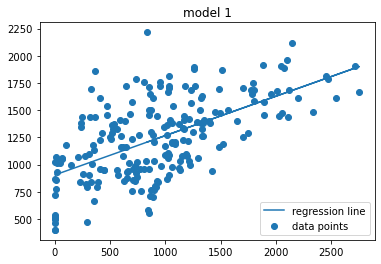

In [43]:
plt.plot( death_increase_num, model1.predict(death_increase_num), label="regression line" )
plt.scatter( death_increase_num, keyword_freq, label="data points" )
plt.title("model 1")
plt.legend()
plt.show()

#### Plotting Model 2:

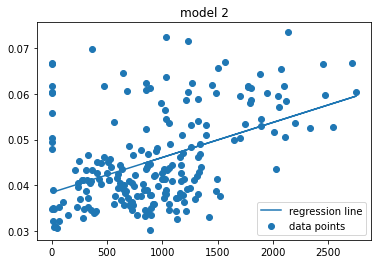

In [45]:
plt.plot(death_increase_num, model2.predict(death_increase_num), label="regression line")
plt.scatter(death_increase_num, relative_freq, label="data points")
plt.title("model 2")
plt.legend()
plt.show()

#### Plotting Model 3:

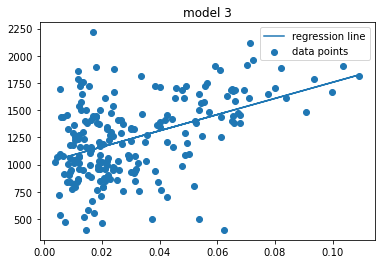

In [47]:
plt.plot(death_increase_ratio, model3.predict(death_increase_ratio), label="regression line")
plt.scatter(death_increase_ratio, keyword_freq, label="data points")
plt.title("model 3")
plt.legend()
plt.show()

#### Plotting Model 4:

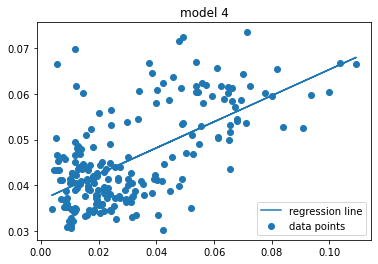

In [49]:
plt.plot(death_increase_ratio, model4.predict(death_increase_ratio), label="regression line")
plt.scatter(death_increase_ratio, relative_freq, label="data points")
plt.title("model 4")
plt.legend()
plt.show()

Comparing $r^2$ values and graphs of these four models, we find these models produce contradictory results. Using `death_increase_num` as the predictor, taking `keyword_freq` as the outcome better captures the linear relationship. However, setting `death_increase_ratio` as the predictor, a linear model works better with `relative_freq` being the outcome. Similarly, comparing model 1 and 3, model 2 and 4, we find that `death_increase_num` works better with `keyword_freq`, and `death_increase_num` works better with `relative_freq`. 
Therefore, instead of simply stating that which variable is a better predictor or indicator, x and y values should be considered simultaneously when building a linear regression model. 

## Evaluationg of Significance: 

In our second analysis, we build four linear regression models. However, even the larger two of them only have $r^2$ values less than 0.4. To investigate whether there exists a linear relationship between death cases and frequencies of “covid+death" on Reddit, or our models merely come from simple randomness, we use randomization to evaluate our linear models.

We want to evaluate our model 1 and 4, whose $r^2$ values are relatively large compared to that of model 2 and 3. 


For Model 1, we randomzie the order of `keyword_freq`. 

In [59]:
new_keyword_freq = keyword_freq.copy()
np.random.shuffle(new_keyword_freq)
model5 = LinearRegression().fit(death_increase_num, new_keyword_freq)
print("R-squared value of the randomized Model 1: {:.4f}".format(model5.score(death_increase_num, new_keyword_freq)))

R-squared value of the randomized Model 1: 0.0028


For Model 2, we randomize the order of `relative_freq`.

In [60]:
new_relative_freq = relative_freq.copy()
np.random.shuffle(new_relative_freq)
model6 = LinearRegression().fit(death_increase_ratio, new_relative_freq)
print("R-squared value of the randomized Model 4: {:.4f}".format(model6.score(death_increase_ratio, new_relative_freq)))

R-squared value of the randomized Model 4: 0.0006


By randomization, we see that simple randomness usually produce much lower $r^2$ values.

Next, to see how well our model predicts such a linear relationship, we use train/test splits to evaluate our models. 

In [65]:
len(data)

214

There are 214 days in our dataset, so we split it into two smaller sets. The training set includes rows whose indices are even, and the test set includes rows whose indices are odd. 

In [89]:
train_index = []
test_index = []
for i in range(len(data)):
    if i % 2 == 0:
        train_index.append(i)
    else:
        test_index.append(i)
train = data.iloc[train_index]
test = data.iloc[test_index]

With the training and test sets, we test our models.

In [100]:
model = LinearRegression().fit(train[ ["death_increase"] ], train["covid_death_count"])
score1 = model.score(train[ ["death_increase"] ], train["covid_death_count"])
print("R-squared value of the training set: {:.4f}".format(score1))

R-squared value of the training set: 0.3852


Then we use this trained model to predict `covid_death_count` in our test set, and see how well our prediction fits the actual variable.

In [101]:
score2 = model.score(test[ ["death_increase"] ], test["covid_death_count"])
print("R-squared value of the test set: {:.4f}".format(score2))

R-squared value of the test set: 0.3204


Comparing these above $r^2$ values, we see that the linear model built on the training set also predicts the behavior of the test set relatively well.

Now, we exchange our training and test sets to have more confidence. 

In [110]:
train = data.iloc[test_index]
test = data.iloc[train_index]
model = LinearRegression().fit(train[ ["death_increase"] ], train["covid_death_count"])
score1 = model.score(train[ ["death_increase"] ], train["covid_death_count"])
print("R-squared value of the training set: {:.4f}".format(score1))
score2 = model.score(test[ ["death_increase"] ], test["covid_death_count"])
print("R-squared value of the test set: {:.4f}".format(score2))

R-squared value of the training set: 0.3274
R-squared value of the test set: 0.3783


Splitting the dataset into two smaller sets，we again show that the linear regression model holds between `death_increase` and `covid_death_count`. 

## Interpretations and Conclusions: 
### Analysis 2:

In our second analysis, we have results showing our previous hypotheses are wrong. However, we note that the $r^2$ value of Model 4 is the highest, and there are several possible explanations:
1. When we use `death_increase_ratio` (daily death cases divided by daily positive cases) and `relative_freq` (daily frequency of "covid+death" divided by daily frequency of "covid" to replace `death_increase_num` and `keyword_freq`, we want to eliminate the influence of the overall spreading of coronavirus. Therefore, we need to use the "arbitrary" or "relative" data simultaneously. That explains why Model 2 and 3 have $r^2$ values lower than that of Model 1 and 4.
2. Model 4 has a higher $r^2$ value compared to that of Model 1, which partly validates our hypotheses. To better capture the relationship in our data, we consider `covid_count` (daily frequency of all comments including "covid") and `positive_increase` (daily positive cases) as less relevant factors and need to minimize their presence if we want to have a clearer image of the relationship between discussion about death and death cases of covid-19.

Overall, after performing analysis and evaluating the significance of our result, we realize there is a linearly relationship between death cases in the US and discussion about death of covid-19 on Reddit. However, the $r^2$ values of our models are lower than expected. There must exist many other factors influencing people's discussion about "covid+death", rather than the situation that Reddit comments react merely to the trend of death cases in the US.